# Simple Keras example of Reuters classifier

Keras, Tensorflow

Reuters is aset of newswires. There are 46 topics for classification. 

This code is heavily inspired in section 3.4 of "Deep Learning with Python" book, by François Chollet

**Features:**
- Code at start avoids full GPU memory allocation. Some interesting threads about this:
-- https://stackoverflow.com/questions/34199233/how-to-prevent-tensorflow-from-allocating-the-totality-of-a-gpu-memory
-- https://kobkrit.com/using-allow-growth-memory-option-in-tensorflow-and-keras-dc8c8081bc96
    


**1 - import data**

In [1]:
import keras as k
from keras.datasets import reuters

dict_size = 10000

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=dict_size)
word_index = reuters.get_word_index()

Using TensorFlow backend.


**2 - input vectorization**

Integer word representations are transformed in binary vectors with the size of the full dictionary. 

In [2]:
import numpy as np

def vectorize_sequences(sequences, dimension=dict_size):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences): 
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


**2.5 - One-hot encoding of label sets**

In [3]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

**3 - Separate validation dataset**

In [4]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

**4 - Define network architecture**

Dimensions of hidden layers -> each layer can potentially become an information bottleneck. We need enough units for the size of the information we are trying to learn. A small sized layer in between can dropout important information than can never be recovered. We are trying to learn 46 different classes here, so we are using large layers.

In [11]:
from keras import models
from keras import layers
from keras import optimizers
from keras.layers import Dense, Dropout

dropout_rate = 0.2

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


**5 - Train**

In [16]:
history = model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 78us/step - loss: 0.4512 - acc: 0.9068 - val_loss: 0.9291 - val_acc: 0.8080
Epoch 2/9
7982/7982 [==============================] - 1s 73us/step - loss: 0.3592 - acc: 0.9250 - val_loss: 0.9376 - val_acc: 0.8030
Epoch 3/9
7982/7982 [==============================] - 1s 75us/step - loss: 0.3000 - acc: 0.9345 - val_loss: 0.9403 - val_acc: 0.8070
Epoch 4/9
7982/7982 [==============================] - 1s 73us/step - loss: 0.2516 - acc: 0.9442 - val_loss: 0.9189 - val_acc: 0.8160
Epoch 5/9
7982/7982 [==============================] - 1s 74us/step - loss: 0.2145 - acc: 0.9493 - val_loss: 0.9090 - val_acc: 0.8130
Epoch 6/9
7982/7982 [==============================] - 1s 72us/step - loss: 0.1876 - acc: 0.9523 - val_loss: 0.9317 - val_acc: 0.8120
Epoch 7/9
7982/7982 [==============================] - 1s 74us/step - loss: 0.1659 - acc: 0.9521 - val_loss: 1.0075 - val_acc: 0.8010
Epoch 8/9
7982

**6 - Show loss performance**

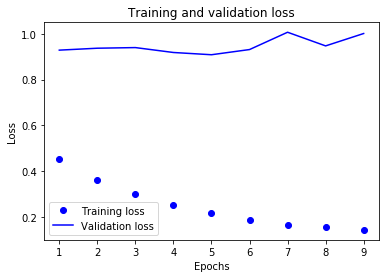

In [17]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

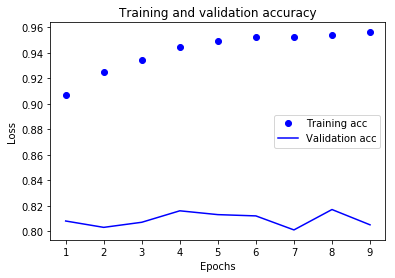

In [18]:
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [23]:
results = model.evaluate(x_test, one_hot_test_labels)
results

2246/2246 [==============================] - 0s 92us/step


[1.1027716186995604, 0.7858414960459524]

In [20]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)


0.20035618878005343

In [22]:
predictions = model.predict(x_test)
np.argmax(predictions[0])

3